<a href="https://colab.research.google.com/github/ashen829/Emotion_Detection_Model/blob/master/Human_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FACE EXPRESSION RECOGNITION**

### **Group Members** :
   
*   EG/2020/3912 - Dissanayake D.M.S.C
*   EG/2020/3905 - Dissanayake D.M.M.I.T
*   EG/2020/4095 - Nethsara R.A.A
*   EG/2020/4112 - Perera H.L.U.G

### **Data Set**

Our first step was finding a dataset suitable for training our deep learning model.Our data set contains the 7 human expression classes including,

    1.   Anger
    2.   Disgust
    3.   Fear
    4.   Happiness
    5.   Neutrality
    6.   Sadness
    7.   Surprise



### **Preprocessing and Data Augmentation**

With our dataset ready, we used advanced techniques to prepare the images. Here’s what we did:


1.   **Resized Images**: We made all images the same size, 48x48 pixels.
2.   **Converted to Grayscale**: We turned images into black and white to make processing easier.
3.  **Normalized Pixel Values:** We adjusted the pixel values to help our model perform better.

We also used data augmentation, which means we created more variety in our images by:

*   Rotating them
*   Flipping them
*   Zooming in and out

These steps helped our model learn better by seeing different versions of the same emotions, making it more reliable in recognizing facial expressions under different conditions.

### **Model Architecture**



*   **Convolutional Neural Network (CNN)**: Chosen for its effectiveness in image recognition.
*   Layers :
  *   **Convolution**: Extracts features from images.
  *   **Batch Normalization**: Normalizes inputs of the previous layer.
  *   **Activation Functions**: Introduce non-linearity (e.g., ReLU).
  *   **Max Pooling**: Reduces spatial dimensions of the feature maps.
  *   **Dropout Regularization**: Prevents overfitting by randomly dropping neurons during training.
  *   **Hierarchical Feature Learning**: Enables the model to learn facial features at different levels of abstraction, crucial for accurate emotion classification.

### **Training and Optimization**
raining our model involved fine-tuning various settings to achieve high accuracy in recognizing emotions. Here’s a breakdown:

*  **Optimizing Settings**: We adjusted important settings (parameters and hyperparameters) to improve performance.
*  **Adam Optimizer**: We used the Adam optimizer, which helps the model learn efficiently.
*  **Categorical Cross-Entropy Loss**: This measured the difference between the emotions the model predicted and the actual emotions.
The training process was rigorous and performed on a powerful, GPU-accelerated platform. This made computations faster and allowed us to quickly test and improve our model.

### **Conclusion**
In conclusion, our Emotion Detection Deep Learning Project shows how computers can learn to understand human emotions through facial expressions. It’s exciting because it could help computers interact with people better in the future, like understanding if someone is happy or sad.


In [2]:
! pip install kaggle

Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! mkdir ~/.kaggle

Set up the Kaggle API

In [5]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mayankanand2701/samsung-stock-price-dataset                     Samsung Stock Price Dataset 📱🏭📈                  114KB  2024-06-13 14:51:11           1249         30  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                 496KB  2024-06-15 18:50:51           2713         69  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26          11029        196  1.0              
rabieelkharoua/students-performance-dataset                     📚 Students 

In [8]:
! kaggle datasets download 'jonathanoheix/face-expression-recognition-dataset'

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
 84% 101M/121M [00:00<00:00, 145MB/s] 
100% 121M/121M [00:00<00:00, 183MB/s]


In [9]:
! unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

Import Libraries

In [10]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from collections import Counter

# Importing Deep Learning Libraries
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras.preprocessing.image import load_img, img_to_array

In [11]:
folder_path = "images/"

In [12]:
# Define image dimensions and batch size
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 32

In [13]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "images/train",
    seed=123,
    shuffle=True,
    image_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 28821 files belonging to 7 classes.


In [14]:
class_names = train_dataset.class_names
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [15]:
# Get the number of classes (unique target labels)
num_classes = len(set(train_dataset.class_names))

# Print the number of classes
print("Number of classes:", num_classes)

Number of classes: 7


In [16]:
# Initialize a counter to count images in each class
class_counts = Counter()

# Iterate over the dataset and update the counter
for images, labels in train_dataset:
    class_counts.update(labels.numpy())

# Map the class counts to the class names
class_names = train_dataset.class_names
class_counts = {class_names[i]: class_counts[i] for i in range(len(class_names))}

# Print the number of images in each class
print("Number of images in each class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Number of images in each class:
angry: 3993
disgust: 436
fear: 4103
happy: 7164
neutral: 4982
sad: 4938
surprise: 3205


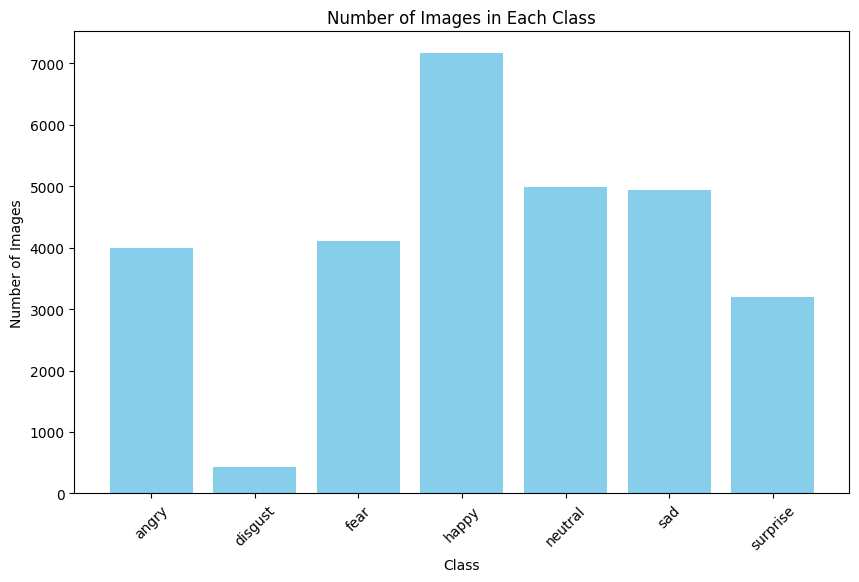

In [17]:
# Plot the class distribution as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=45)
plt.show()

Visualized sample images from the dataset

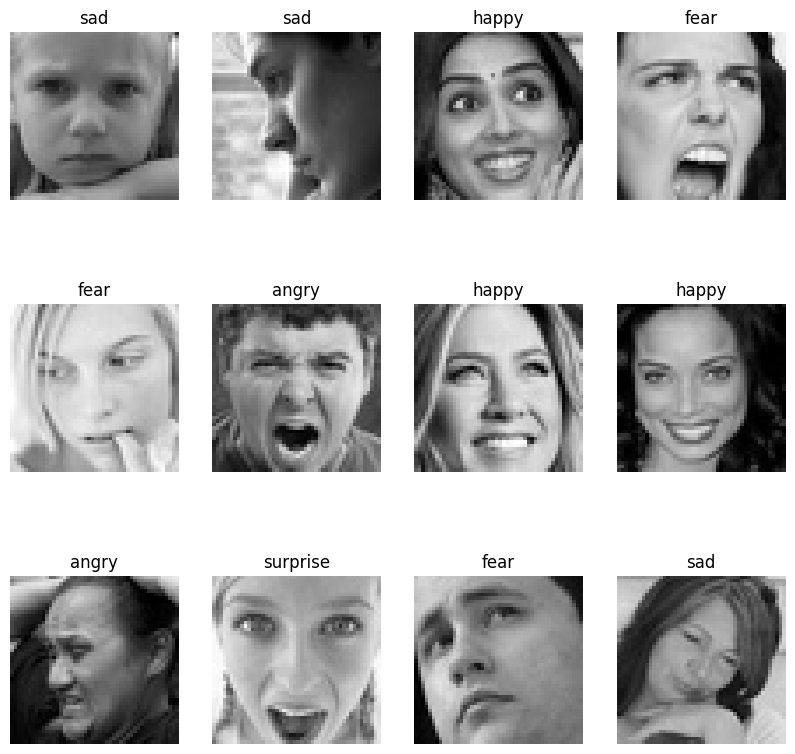

In [18]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

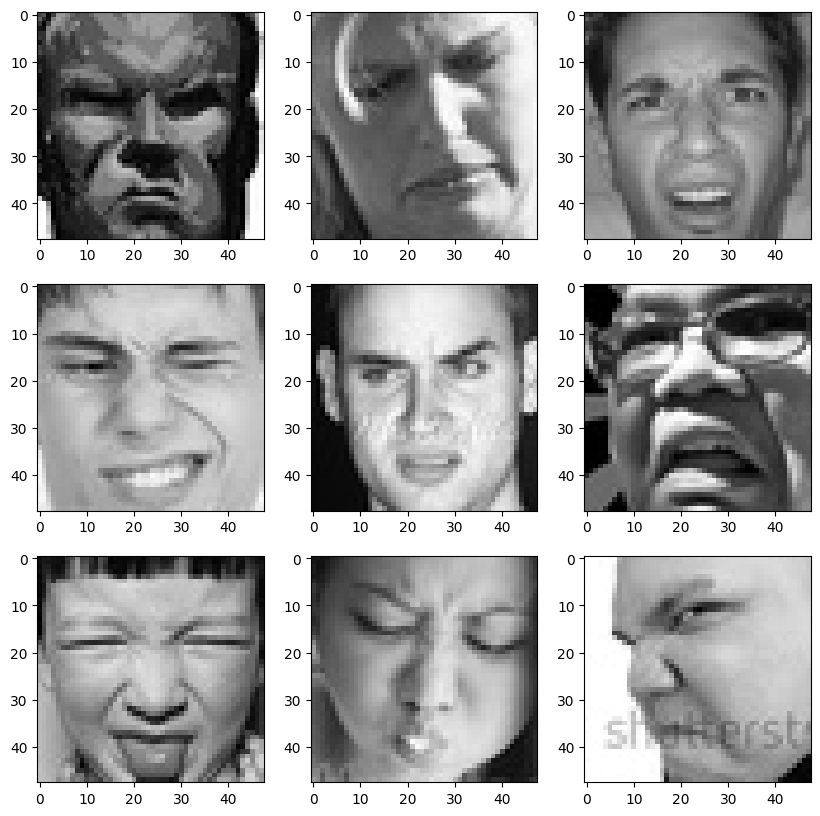

In [19]:
expression = 'disgust'

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(IMG_HEIGHT, IMG_WIDTH))
    plt.imshow(img)
plt.show()

In [20]:
train_data_dir=folder_path+"train/"
validation_data_dir=folder_path+"validation/"

Image Preprocessing

Data Augmentation

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize the pixel values to the range [0, 1]
    rotation_range=30, # Randomly rotate the images by up to 30 degrees
    shear_range=0.3, # Shear the image by up to 30%
    zoom_range=0.3, # Zoom in on the image by up to 30%
    horizontal_flip=True, # Randomly flip the images horizontally
    fill_mode='nearest' # Fill in any missing pixels after a transformation with the nearest pixel value
)

In [22]:
validation_datagen = ImageDataGenerator(rescale=1./255) # Normalize the pixel values to the range [0, 1]

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir, # Directory containing the training data
    color_mode='grayscale', # Convert images to grayscale
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize images to the specified height and width
    batch_size=BATCH_SIZE, # Number of images to return in each batch
    class_mode='categorical', # Return one-hot encoded labels
    shuffle=True # Shuffle the order of the images
)

Found 28821 images belonging to 7 classes.


In [24]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir, # Directory containing the validation data
    color_mode='grayscale', # Convert images to grayscale
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize images to the specified height and width
    batch_size=BATCH_SIZE, # Number of images to return in each batch
    class_mode='categorical', # Return one-hot encoded labels
    shuffle=True # Shuffle the order of the images
)

Found 7066 images belonging to 7 classes.


In [25]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [26]:
img, label = train_generator.__next__() # img: (32, 48, 48, 1) label: (32, 7)

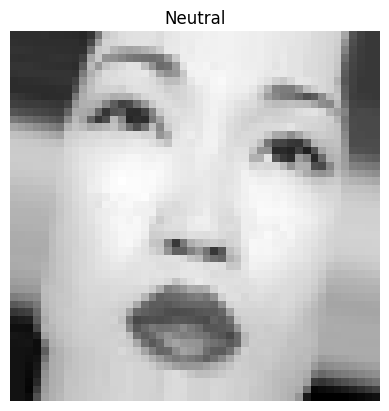

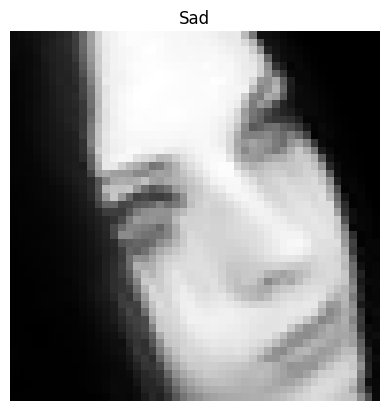

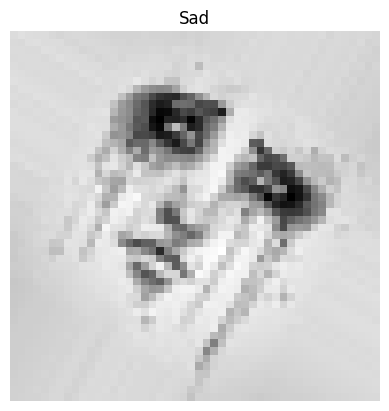

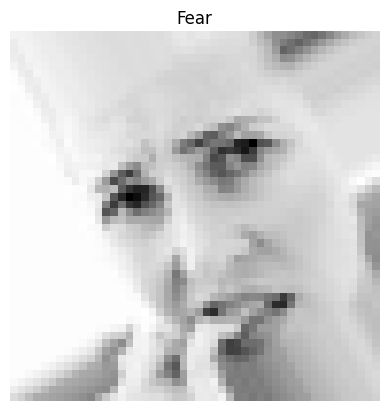

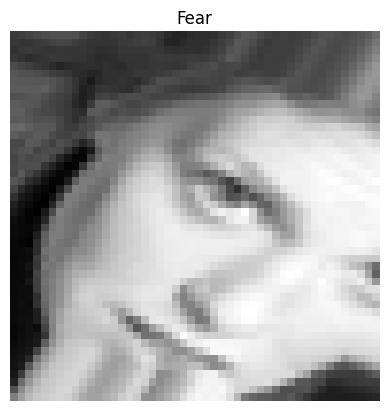

In [27]:
# Plotting the first few images and their labels from the batch
for i in range(5):
    plt.imshow(img[i].reshape(48, 48), cmap='gray')
    plt.title(class_labels[np.argmax(label[i])])
    plt.axis('off')
    plt.show()

In [28]:
train_path = folder_path+"train/"
test_path = folder_path+"validation/"

In [29]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [30]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

Model Architecture

In [31]:
from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential() # type of model that allows us to build the model layer by layer

#1st CNN layer

# 64=>The number of filters (3, 3)=>The size of the filters  padding = 'same'=>output size=input size.
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1))) # 1 color channel (grayscale)
model.add(BatchNormalization()) # normalizes the inputs
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # To decrease dimentions
model.add(Dropout(0.25)) # To prevent overfitting (Dropout Regularization)

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())  # multi-dimensional input into a 1D vector

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate=  0.0001)  # Adaptive Moment Estimation (Stochastic Gradient Descent with Momentum)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [32]:
epochs=50

history = model.fit(train_generator,
                    steps_per_epoch=num_train_imgs // BATCH_SIZE,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_test_imgs // BATCH_SIZE,
                    )

Epoch 1/50
900/900 [==============================] - 129s 141ms/step - loss: 1.9901 - accuracy: 0.2229 - val_loss: 1.7789 - val_accuracy: 0.2788
Epoch 2/50
900/900 [==============================] - 123s 137ms/step - loss: 1.8748 - accuracy: 0.2520 - val_loss: 1.7054 - val_accuracy: 0.3119
Epoch 3/50
900/900 [==============================] - 121s 135ms/step - loss: 1.8112 - accuracy: 0.2807 - val_loss: 1.6943 - val_accuracy: 0.3455
Epoch 4/50
900/900 [==============================] - 122s 135ms/step - loss: 1.7465 - accuracy: 0.3083 - val_loss: 1.6830 - val_accuracy: 0.3645
Epoch 5/50
900/900 [==============================] - 120s 133ms/step - loss: 1.6990 - accuracy: 0.3326 - val_loss: 1.5261 - val_accuracy: 0.4077
Epoch 6/50
900/900 [==============================] - 120s 133ms/step - loss: 1.6428 - accuracy: 0.3532 - val_loss: 1.4791 - val_accuracy: 0.4315
Epoch 7/50
900/900 [==============================] - 120s 133ms/step - loss: 1.5965 - accuracy: 0.3767 - val_loss: 1.3765 -

KeyboardInterrupt: 

In [ ]:
model.save('Human_Emotion_Recog_Model_50epochs.h5')

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

In [ ]:
#Test the model
my_model = load_model('Human_Emotion_Recog_Model_50epochs.h5', compile=False)

In [ ]:
#Generate a batch of images (32 images from the validation dataset)
test_img, test_lbl = validation_generator.__next__() #test imag :(32,48,48,1) tast lbl : (32,7)
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1) #do prediction of all
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get true labels and predictions
true_labels = validation_generator.classes
pred_labels = np.argmax(model.predict(validation_generator), axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import random
# class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()